In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow
import keras
from joblib import dump
import pickle

In [2]:
word_lemitizer=WordNetLemmatizer()
Regular_expression_definition_for_html_tags=re.compile('<.*?>')
Regular_expression_definition_for_digits=re.compile('\d+\s|\s\d+|\s\d+\s')
english_stop_words=stopwords.words('english')
def preprocessing_of_sentence(text):
    word_to_be_handled=[
    "not",
    "no",
    "very"
    ]
    text=Regular_expression_definition_for_html_tags.sub(r" ",text)
    text=Regular_expression_definition_for_digits.sub(r" ",text)
    punctuations = [".",",","!","?","'",'"',":",";","*","-","/","+","%","$","#","@","(",")","[","]","{","}"]
    for i in punctuations:
        text = text.replace(i," ")
    text=text.lower().split()
    text=[word for word in text if word not in english_stop_words and len(word)>1 or word in word_to_be_handled]
    text=[word_lemitizer.lemmatize(word) for word in text]
    return text

In [3]:
class_column='Liked'
review_column='Review'

In [4]:
class_list=["Bad","Good"]

In [5]:
filename="Restaurant_Reviews.tsv"

In [6]:
Total_Data=pandas.read_csv('../Data/Processed_Data/'+filename)

In [7]:
Total_Data

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall impressed would go back,0
998,whole experience underwhelming think go ninja ...,0


## Shuffelling and Spliting in features and labels

In [8]:
Total_Data=Total_Data.sample(frac=1)

In [9]:
total_Features=Total_Data[review_column]
total_Labels=Total_Data[class_column]

# Vecorization

In [10]:
Vectorizer=TfidfVectorizer()

In [11]:
def vectorize_the_input(data):
    return Vectorizer.transform(data)

In [12]:
Total_Vector_Data=Vectorizer.fit_transform(total_Features.values.astype('U'))

In [13]:
# with open("../Models/Tockenizer.pickle","wb") as f:
#     pickle.dump(Vectorizer,f)

In [14]:
Training_Vector_Data=Total_Vector_Data[:800]
Testing_Vector_Data=Total_Vector_Data[800:]

In [15]:
training_Labels=Total_Data[class_column][:800]
testing_Labels=Total_Data[class_column][800:]

## Input Preparation

In [16]:
input_="i have found the good restaurent"
input_=preprocessing_of_sentence(input_)
input_=vectorize_the_input([" ".join(input_)])

In [17]:
def getSentimentFromNeuranNetwork(value):
    if value>0.6:
        return "Good"
    elif value<0.3:
        return "Bad"
    else:
        return "Neutral"

## Statastical Models

### 1. SVM

In [259]:
svmModel=LinearSVC()

In [260]:
svmModel.fit(Training_Vector_Data,training_Labels)

LinearSVC()

In [261]:
svm_Prediction=svmModel.predict(Testing_Vector_Data)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       104
           1       0.77      0.78      0.77        96

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



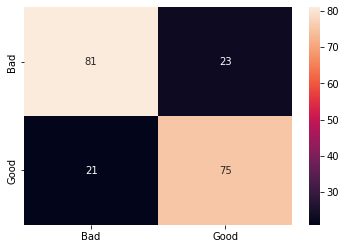

In [263]:
seaborn.heatmap(confusion_matrix(testing_Labels,svm_Prediction),annot=True,xticklabels=class_list,yticklabels=class_list)
print(classification_report(testing_Labels,svm_Prediction))

In [264]:
class_list[svmModel.predict(input_)[0]]

'Good'

In [302]:
# dump(svmModel, '../Models/svmModel.joblib')

### 2. Logistic Regression

In [266]:
logisticModel=LogisticRegression(max_iter=25000)

In [267]:
logisticModel.fit(Training_Vector_Data,training_Labels)

LogisticRegression(max_iter=25000)

In [268]:
logistic_Prediction=logisticModel.predict(Testing_Vector_Data)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       104
           1       0.82      0.77      0.80        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



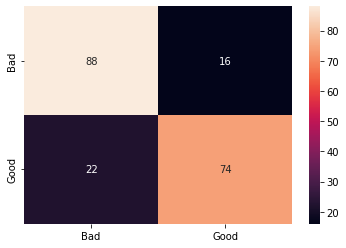

In [269]:
seaborn.heatmap(confusion_matrix(testing_Labels,logistic_Prediction),annot=True,xticklabels=class_list,yticklabels=class_list)
print(classification_report(testing_Labels,logistic_Prediction))

In [270]:
class_list[logisticModel.predict(input_)[0]]

'Good'

In [303]:
# dump(logisticModel, '../Models/logisticModel.joblib')

### 3. MultinomialNB (naive_bayes)

In [272]:
naive_bayesModel=MultinomialNB()

In [273]:
naive_bayesModel.fit(Training_Vector_Data,training_Labels)

MultinomialNB()

In [274]:
naive_bayesPrediction=naive_bayesModel.predict(Testing_Vector_Data)

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       104
           1       0.77      0.82      0.79        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



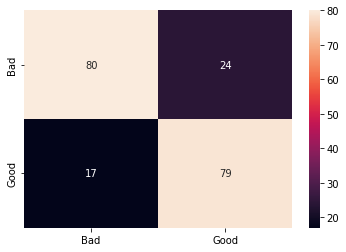

In [275]:
seaborn.heatmap(confusion_matrix(testing_Labels,naive_bayesPrediction),annot=True,xticklabels=class_list,yticklabels=class_list)
print(classification_report(testing_Labels,naive_bayesPrediction))

In [276]:
class_list[naive_bayesModel.predict(input_)[0]]

'Good'

In [304]:
# dump(naive_bayesModel, '../Models/naive_bayesModel.joblib')

### 3. RandomForestClassifier

In [278]:
randomForestClassifierModel=RandomForestClassifier(max_depth=100)

In [279]:
randomForestClassifierModel.fit(Training_Vector_Data,training_Labels)

RandomForestClassifier(max_depth=100)

In [280]:
randomForestClassifierPrediction=randomForestClassifierModel.predict(Testing_Vector_Data)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       104
           1       0.86      0.66      0.75        96

    accuracy                           0.79       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.80      0.79      0.78       200



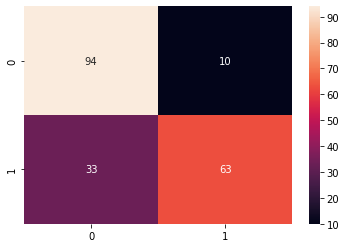

In [281]:
seaborn.heatmap(confusion_matrix(testing_Labels,randomForestClassifierPrediction),annot=True)
print(classification_report(testing_Labels,randomForestClassifierPrediction))

In [282]:
class_list[randomForestClassifierModel.predict(input_)[0]]

'Good'

In [305]:
# dump(randomForestClassifierModel, '../Models/randomForestClassifierModel.joblib')

## DEEP LEARNING APPROACH

In [18]:
NeuralNetworkModel1=keras.models.Sequential([
         keras.layers.Dense(units=32, activation='relu',input_dim=Training_Vector_Data.shape[1]),
         keras.layers.Dense(units=1, activation='sigmoid')
    ]
 )

In [19]:
NeuralNetworkModel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                56608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 56,641
Trainable params: 56,641
Non-trainable params: 0
_________________________________________________________________


In [20]:
NeuralNetworkModel1.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
NeuralNetworkModel1.fit(Training_Vector_Data.toarray(),training_Labels.to_numpy(),epochs=25,batch_size=50,verbose=1,validation_data=(Testing_Vector_Data.toarray(),testing_Labels.to_numpy()))

Epoch 1/25
16/16 [==============================] - 2s 48ms/step - loss: 0.6902 - accuracy: 0.5938 - val_loss: 0.6874 - val_accuracy: 0.6500
Epoch 2/25
16/16 [==============================] - 0s 11ms/step - loss: 0.6756 - accuracy: 0.8213 - val_loss: 0.6804 - val_accuracy: 0.7100
Epoch 3/25
16/16 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0.8838 - val_loss: 0.6714 - val_accuracy: 0.7300
Epoch 4/25
16/16 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.9100 - val_loss: 0.6612 - val_accuracy: 0.7300
Epoch 5/25
16/16 [==============================] - 0s 6ms/step - loss: 0.6136 - accuracy: 0.9200 - val_loss: 0.6496 - val_accuracy: 0.7100
Epoch 6/25
16/16 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.9262 - val_loss: 0.6377 - val_accuracy: 0.7050
Epoch 7/25
16/16 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.9250 - val_loss: 0.6253 - val_accuracy: 0.7050
Epoch 8/25
16/16 

In [293]:
getSentimentFromNeuranNetwork(NeuralNetworkModel1.predict(input_.toarray())[0][0])

'Good'

In [23]:
CNNPredictions=NeuralNetworkModel1.predict(Testing_Vector_Data.toarray())

In [25]:
def getSentimentFromNeuranNetwork(value):
    if value>=0.5:
        # return "Good"
        return 1
    elif value<0.5:
        return 0
        # return "Bad"
    # else:
        # return "Neutral"

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       104
           1       0.68      0.68      0.68        96

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



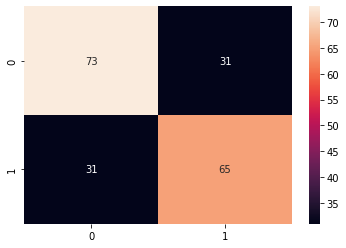

In [26]:
seaborn.heatmap(confusion_matrix(testing_Labels,[getSentimentFromNeuranNetwork(i) for i in CNNPredictions]),annot=True)
print(classification_report(testing_Labels,[getSentimentFromNeuranNetwork(i) for i in CNNPredictions]))

In [1]:
table={
    "model name":[
"SVM",
"Logistic",
"Random Forest"
    ],
    "Accuracy on testing Data":[
78,82,79
    ]
}

In [2]:
import pandas

In [3]:
table_details=pandas.DataFrame(table)

In [4]:
table_details

,model name,Accuracy on testing Data
0,SVM,78
1,Logistic,82
2,Random Forest,79


In [6]:
%matplotlib qt

In [7]:
table_details.plot(x='model name',y=['Accuracy on testing Data'])

<AxesSubplot:xlabel='model name'>

In [289]:
# NeuralNetworkModel1.save('../Models/NeuralNetworkModel1.h5')